In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()




In [4]:
df = pd.read_csv('COVID_dataset.csv')

# Data Cleaning

In [5]:
df.dtypes

Accurate_Episode_Date       object
Case_Reported_Date          object
Test_Reported_Date          object
Specimen_Date               object
Age_Group                   object
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
Outcome1                    object
dtype: object

In [6]:
df.Specimen_Date.isnull().sum()

122

In [7]:
df.Test_Reported_Date.isnull().sum()

203

In [8]:
df.Case_Reported_Date.isnull().sum()


0

In [9]:
df.Accurate_Episode_Date.isnull().sum()


0

In [10]:
import datetime as dt
def excel_date(date1):
    temp = dt.datetime(1899, 12, 30)    # Note, not 31st Dec but 30th!
    delta = date1 - temp
    return float(delta.days) + (float(delta.seconds) / 86400)

In [11]:
# df["Case_Reported_Date_Num"] = df["Case_Reported_Date"].apply(excel_date)

In [12]:
#Remove columns of test_reported_date and Specimen_Date
df = df.drop(['Accurate_Episode_Date','Case_Reported_Date','Case_Reported_Date','Accurate_Episode_Date'], axis=1)

In [13]:
df.Outcome1.value_counts(dropna = False)

Not Resolved    5008
Resolved        4955
Fatal           4897
Name: Outcome1, dtype: int64

In [14]:
df.Age_Group.value_counts(dropna = False)

80s    2203
20s    2034
90s    1814
50s    1724
30s    1610
40s    1438
70s    1429
60s    1383
<20    1220
NaN       5
Name: Age_Group, dtype: int64

As there are 6 missing values in age, we will replace by median age and encode the age feature into labelencoding

In [15]:
df['Age_Group'] = df['Age_Group'].replace(np.nan, '50s') 

In [16]:
df.Age_Group.value_counts(dropna = False)

80s    2203
20s    2034
90s    1814
50s    1729
30s    1610
40s    1438
70s    1429
60s    1383
<20    1220
Name: Age_Group, dtype: int64

In [17]:
# Label Encoding of Age _Group Variable
# 0 = 0
# 1 = <20
# 2 = 20s
# 3 = 30s
# 4 = 40s
# 5 = 50s
# 6 = 60s
# 7 = 70s
# 8 = 80s
# 9 = 90s

le.classes_ =np.array(['0','<20', '20s','30s','40s','50s','60s','70s','80s','90s'])
df['Age_code'] = le.transform(df['Age_Group'])

In [18]:
df.Client_Gender.value_counts(dropna = False)

FEMALE            7562
MALE              7192
UNSPECIFIED        105
GENDER DIVERSE       1
Name: Client_Gender, dtype: int64

Since there are only 2 instance in gender diverse field, we will include gender diverse into Unspecified and consider only three broader category in Gender for ease of calculation. Also we will do one hot encoding for Gender

In [19]:
df.Client_Gender = df.Client_Gender.replace({"GENDER DIVERSE": "UNSPECIFIED"})

In [20]:
df.Client_Gender.value_counts(dropna = False)

FEMALE         7562
MALE           7192
UNSPECIFIED     106
Name: Client_Gender, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=["Client_Gender"])

df.head()

,Test_Reported_Date,Specimen_Date,Age_Group,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Age_code,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED
0,2020-03-31,2020-03-30,70s,OB,Stratford,Yes,43.368662,-81.001913,Fatal,7,0,1,0
1,2021-01-24,2021-01-23,50s,NO KNOWN EPI LINK,Newmarket,NaN,44.048023,-79.480239,Not Resolved,5,1,0,0
2,2020-04-14,2020-04-13,70s,OB,Toronto,Yes,43.656591,-79.379358,Resolved,7,1,0,0
3,2021-01-21,2021-01-18,<20,CC,Mississauga,NaN,43.647471,-79.708893,Not Resolved,1,0,1,0
4,2020-12-28,2020-12-26,60s,OB,Windsor,Yes,42.308796,-83.033670,Resolved,6,0,1,0


In [22]:
df.Case_AcquisitionInfo.value_counts(dropna = False)

OB                      5371
CC                      4121
MISSING INFORMATION     2929
NO KNOWN EPI LINK       2242
TRAVEL                   192
UNSPECIFIED EPI LINK       5
Name: Case_AcquisitionInfo, dtype: int64

In [23]:
df.Outbreak_Related.value_counts(dropna = False)

NaN    9082
Yes    5778
Name: Outbreak_Related, dtype: int64

Replacing Nan with 0 and Yes with 1  

In [24]:
df.Outbreak_Related = df.Outbreak_Related.replace(np.nan,0)
df.Outbreak_Related = df.Outbreak_Related.replace({"Yes":1})

In [25]:
df.Outbreak_Related.value_counts(dropna = False)

0    9082
1    5778
Name: Outbreak_Related, dtype: int64

In [26]:
df["Outbreak_Related"] = df.Outbreak_Related.astype(np.uint8)

In [27]:
df.Outcome1.value_counts(dropna = False)

Not Resolved    5008
Resolved        4955
Fatal           4897
Name: Outcome1, dtype: int64

In [28]:
df.Case_AcquisitionInfo = df.Case_AcquisitionInfo.replace({
                                                          "UNSPECIFIED EPI LINK": "MISSING INFORMATION",
                                                          "OB": "OUTBREAK", "CC": "CLOSE CONTACT",})

In [29]:
df.Case_AcquisitionInfo.value_counts(dropna = False)

OUTBREAK               5371
CLOSE CONTACT          4121
MISSING INFORMATION    2934
NO KNOWN EPI LINK      2242
TRAVEL                  192
Name: Case_AcquisitionInfo, dtype: int64

In [30]:
df = pd.get_dummies(df, columns=["Case_AcquisitionInfo"])
df.head()

,Test_Reported_Date,Specimen_Date,Age_Group,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Age_code,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CLOSE CONTACT,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OUTBREAK,Case_AcquisitionInfo_TRAVEL
0,2020-03-31,2020-03-30,70s,Stratford,1,43.368662,-81.001913,Fatal,7,0,1,0,0,0,0,1,0
1,2021-01-24,2021-01-23,50s,Newmarket,0,44.048023,-79.480239,Not Resolved,5,1,0,0,0,0,1,0,0
2,2020-04-14,2020-04-13,70s,Toronto,1,43.656591,-79.379358,Resolved,7,1,0,0,0,0,0,1,0
3,2021-01-21,2021-01-18,<20,Mississauga,0,43.647471,-79.708893,Not Resolved,1,0,1,0,1,0,0,0,0
4,2020-12-28,2020-12-26,60s,Windsor,1,42.308796,-83.033670,Resolved,6,0,1,0,0,0,0,1,0


In [31]:
df = df.drop(['Age_Group','Reporting_PHU_City'], axis=1)

In [32]:
df["Outcome1"] = df.Outcome1.astype('category')

In [33]:
df.dtypes

Test_Reported_Date                            object
Specimen_Date                                 object
Outbreak_Related                               uint8
Reporting_PHU_Latitude                       float64
Reporting_PHU_Longitude                      float64
Outcome1                                    category
Age_code                                       int64
Client_Gender_FEMALE                           uint8
Client_Gender_MALE                             uint8
Client_Gender_UNSPECIFIED                      uint8
Case_AcquisitionInfo_CLOSE CONTACT             uint8
Case_AcquisitionInfo_MISSING INFORMATION       uint8
Case_AcquisitionInfo_NO KNOWN EPI LINK         uint8
Case_AcquisitionInfo_OUTBREAK                  uint8
Case_AcquisitionInfo_TRAVEL                    uint8
dtype: object

In [34]:
df.isnull().sum()

Test_Reported_Date                          203
Specimen_Date                               122
Outbreak_Related                              0
Reporting_PHU_Latitude                        0
Reporting_PHU_Longitude                       0
Outcome1                                      0
Age_code                                      0
Client_Gender_FEMALE                          0
Client_Gender_MALE                            0
Client_Gender_UNSPECIFIED                     0
Case_AcquisitionInfo_CLOSE CONTACT            0
Case_AcquisitionInfo_MISSING INFORMATION      0
Case_AcquisitionInfo_NO KNOWN EPI LINK        0
Case_AcquisitionInfo_OUTBREAK                 0
Case_AcquisitionInfo_TRAVEL                   0
dtype: int64

In [35]:
df.Outcome1.value_counts()

Not Resolved    5008
Resolved        4955
Fatal           4897
Name: Outcome1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


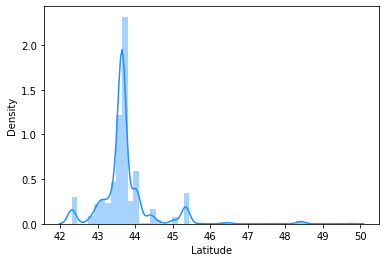

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


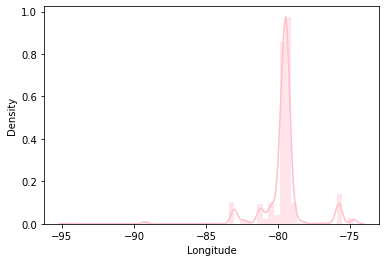

In [36]:
sns.distplot(df[['Reporting_PHU_Latitude']], color = "dodgerblue", axlabel= "Latitude")
plt.show()
sns.distplot(df[['Reporting_PHU_Longitude']], color = "pink", axlabel="Longitude")
plt.show()

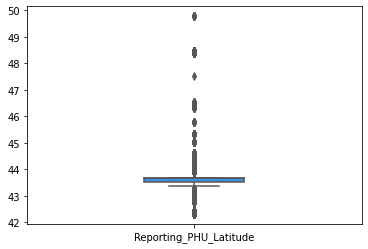

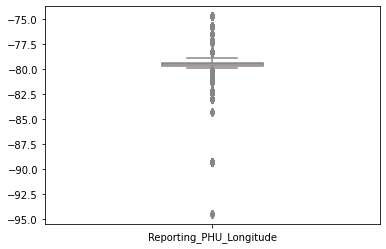

In [37]:
sns.boxplot(data=df[['Reporting_PHU_Latitude']],width = 0.3, color = "dodgerblue")
plt.show()
sns.boxplot(data=df[['Reporting_PHU_Longitude']],width = 0.3, color = "pink")
plt.show()

### <https://phik.readthedocs.io/en/latest/>

In [38]:
# Correlation 
!pip install phik
import phik
from phik import resources, report

     |████████████████████████████████| 1.1MB 6.2MB/s 
     |████████████████████████████████| 27.4MB 130kB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a2c0086a4045189e53e52e6e9272809a2554626b883a190372ba31da33c7bab3
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built phik
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


interval columns not set, guessing: ['Outbreak_Related', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude', 'Age_code', 'Client_Gender_FEMALE', 'Client_Gender_MALE', 'Client_Gender_UNSPECIFIED', 'Case_AcquisitionInfo_CLOSE CONTACT', 'Case_AcquisitionInfo_MISSING INFORMATION', 'Case_AcquisitionInfo_NO KNOWN EPI LINK', 'Case_AcquisitionInfo_OUTBREAK', 'Case_AcquisitionInfo_TRAVEL']


Text(0.5, 1.0, 'Correlation Matrix Covid Dataset')

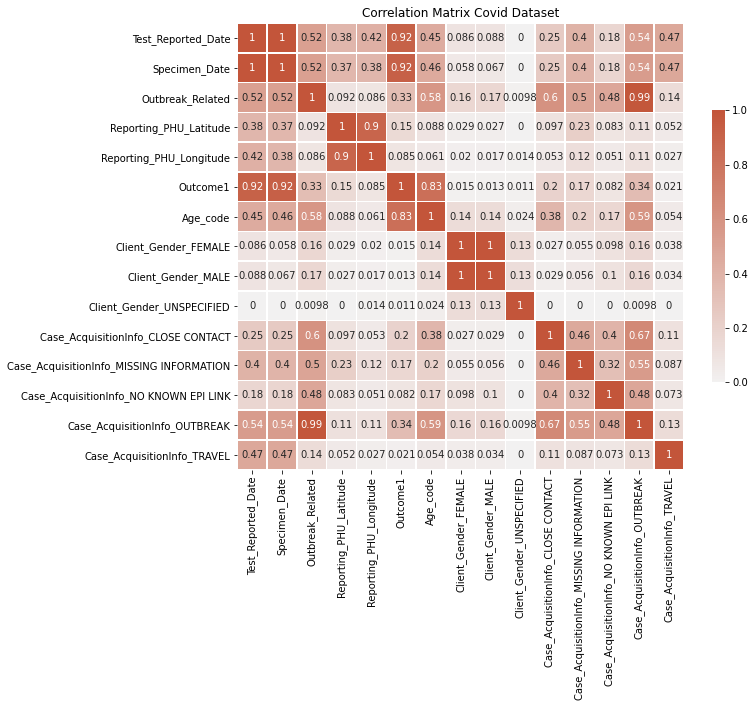

In [39]:
corr = df.phik_matrix()
plt.figure(figsize=(10,10))
ax = plt.axes()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap =cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_title('Correlation Matrix Covid Dataset')

As we see that the Client Gender is showing a weak correlation (0.015,0.013,0.011) with Outcome1 Variable. Thus it doesn't make sense using that variable in the analysis.

In [40]:
df = df.drop(['Client_Gender_FEMALE','Client_Gender_MALE','Client_Gender_UNSPECIFIED'], axis=1)

In [41]:
df.keys()

Index(['Test_Reported_Date', 'Specimen_Date', 'Outbreak_Related',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude', 'Outcome1',
       'Age_code', 'Case_AcquisitionInfo_CLOSE CONTACT',
       'Case_AcquisitionInfo_MISSING INFORMATION',
       'Case_AcquisitionInfo_NO KNOWN EPI LINK',
       'Case_AcquisitionInfo_OUTBREAK', 'Case_AcquisitionInfo_TRAVEL'],
      dtype='object')

In [42]:
#X = df[['Outbreak_Related','Reporting_PHU_Latitude','Reporting_PHU_Longitude','Age_code','Case_AcquisitionInfo_CLOSE CONTACT','Case_AcquisitionInfo_MISSING INFORMATION','Case_AcquisitionInfo_OUTBREAK','Case_AcquisitionInfo_TRAVEL','Case_AcquisitionInfo_NO_SPREAD']]

X=df[['Outbreak_Related', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude',
        'Age_code', 'Case_AcquisitionInfo_CLOSE CONTACT',
       'Case_AcquisitionInfo_MISSING INFORMATION',
       'Case_AcquisitionInfo_NO KNOWN EPI LINK',
       'Case_AcquisitionInfo_OUTBREAK', 'Case_AcquisitionInfo_TRAVEL']]
y = df[['Outcome1']]
y = le.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# Use the below code for RNN as we need consecutive data for train, val and test set.

# column_indices = {name: i for i, name in enumerate(df.columns)}

# n = len(df)
# train_df = df[0:int(n*0.7)]
# val_df = df[int(n*0.7):int(n*0.9)]
# test_df = df[int(n*0.9):]

# num_features = df.shape[1]

# PreProcessing

As we know that the Normalizing the binary variable can be possible but it doesn't make sense in terms of decision tree analysis. It is more easier to use binary variable as it is. 

In [44]:
# Normalization (Z-score)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_z= X.copy()

X_z[['Reporting_PHU_Latitude','Reporting_PHU_Longitude']] = std_scaler.fit_transform(X_z[['Reporting_PHU_Latitude','Reporting_PHU_Longitude']])
# X_z = X_z.values
# X_z
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_z, y, test_size=0.2, random_state=0)
X_val_z, X_test_z, y_val_z, y_test_z = train_test_split(X_test_z, y_test_z, test_size=0.5, random_state=0)
                                                            

In [ ]:
X_train_z.shape

(11888, 9)

In [ ]:
# Normalization (Z-score)
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()

X_n= X.copy()

X_n[['Reporting_PHU_Latitude','Reporting_PHU_Longitude']] = min_scaler.fit_transform(X_n[['Reporting_PHU_Latitude','Reporting_PHU_Longitude']])
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y, test_size=0.2, random_state=0)
X_val_n, X_test_n, y_val_n, y_test_n = train_test_split(X_test_n, y_test_n, test_size=0.5, random_state=0)

# Model Training

In [45]:
# !pip install keras
# !pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
# from keras.callbacks import LearningRateMonitor
import keras  
from sklearn.model_selection import GridSearchCV
from keras.utils.vis_utils import plot_model
early_stop = EarlyStopping(patience=2)






## MODEL 1-DNN - DESCRIPTION:



### Network architecture: 
###### LAYER-1 (Input Layer): 
The first layer is the input layer whih directly sees the input and have fully connected 12 neurons. The Initialization function is taken as he_normal as it is widely used in the literature and takes care of the vanishing/exploding gradient. We have used ReLU as non-linear actiation for this layer

###### LAYER-2 (Hidden Layer 1): 
The second layer is the first hidden layer with fully connected 8 neurons and intialization function as he_normal. We have used ReLU as non-linear actiation for this layer

###### LAYER-3 (Hidden Layer 2):  
The third layer is the second hidden layer with fully connected 5 neurons and intialization function as he_normal. We have used ReLU as non-linear actiation for this layer 

###### LAYER-4 (Output Layer): 

Since we have to classify our data into three category, we have 3 neurons in the output layer with softmax acyivation function to assign probability for each category. Also we have used he_normal as initialization weight.

### Optimizers: 
Model was compiled with optimizer as adam  with loss as sparse_categorical_crossentropy and metrics is taken as accuracy.Adam is the best among the adaptive optimizers in most of the cases. Good with sparse data: the adaptive learning rate is perfect for this type of datasets.

### Activation functions:
1. ReLu: The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better. The rectified linear activation is the default activation when developing Deep fully connected neural networks.
2. Softmax: The softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

### Regularization methods:
Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model


### Design choice:
This is shallow full connected Neural network with same Initialization weight and  Activation function in all layers excpt outpyt layer. Total parameters to be trained are 287 and we have minimum no of layers compared to other models.

In [46]:
# Model 1
seed = 7
np.random.seed(seed)
model_1 = Sequential()

model_1.add(Dense(12, activation='relu', kernel_initializer='he_normal' ,input_shape=(9,)))
model_1.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model_1.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model_1.add(Dense(3,kernel_initializer='he_normal', activation='softmax'))

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
# rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1E-7)
# lrm = LearningRateMonitor()
# history = model_1.fit(X_train_z, y_train_z, epochs=50, batch_size=16, verbose=0 ,validation_data = (X_val_z,y_val_z))#, callbacks=EarlyStopping(patience=2))



# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='val')
# plt.legend()
# evaluate the model
# loss, acc = model.evaluate(X_val_z, y_val_z, verbose=0)
# print('Validation Accuracy: %.3f' % acc)
# max(history.history['val_accuracy'])
# sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])


In [47]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


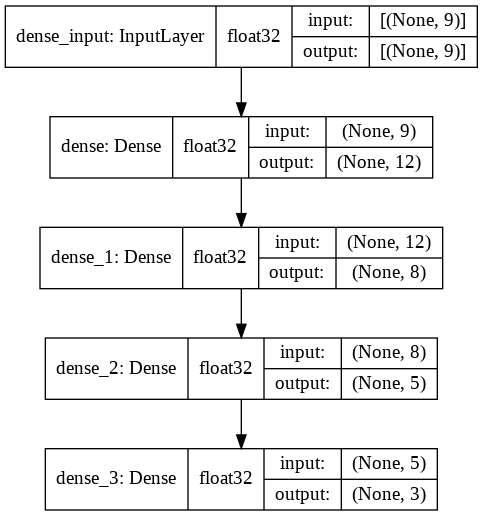

In [49]:
plot_model(model_1, show_shapes=True, show_dtype=True, expand_nested=True,to_file='MODEL_1_CNN.png') 

## MODEL 2-DNN - DESCRIPTION:



### Network architecture: 
###### LAYER-1 (Input Layer): 
The first layer is the input layer whih directly sees the input and have fully connected 20 neurons. The Initialization function is taken as normal to divide the initialization weight normally. We have used ReLU as non-linear actiation for this layer

###### LAYER-2 (Hidden Layer 1): 
The second layer is the first hidden layer with fully connected 8 neurons and intialization function as he_normal to compensate the problem of exploding/vanishing gradient. We have used tanh as non-linear actiation for this layer.

###### LAYER-3 (Hidden Layer 2):  
The third layer is the second hidden layer with fully connected 12 neurons and intialization function as he_normal. We have used tanh as non-linear actiation for this layer.

###### LAYER-4 (Hidden Layer 3):  
The fourth layer is the third hidden layer with fully connected 12 neurons and intialization function as normal. We have used ReLU as non-linear actiation for this layer.

###### LAYER-5 (Hidden Layer 4):  
The fifth layer is the second hidden layer with fully connected 12 neurons and intialization function as he_normal. We have used tanh as non-linear actiation for this layer.

###### LAYER-6 (Hidden Layer 5):  
The sixth layer is the second hidden layer with fully connected 5 neurons and intialization function as normal. We have used ReLU as non-linear actiation for this layer.

###### LAYER-7 (Output Layer): 

Since we have to classify our data into three category, we have 3 neurons in the output layer with softmax acyivation function to assign probability for each category. Also we have used he_normal as initialization weight.

### Optimizers: 
Model was compiled with optimizer as adam  with loss as sparse_categorical_crossentropy and metrics is taken as accuracy.Adam is the best among the adaptive optimizers in most of the cases. Good with sparse data: the adaptive learning rate is perfect for this type of datasets.

### Activation functions:
1. ReLu: The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better. The rectified linear activation is the default activation when developing Deep fully connected neural networks.
2. tanh:The hyperbolic tangenet activation function works with gradient descent and helps in converging the dataset quite quicly as the output is centered around 0.
3. Softmax: The softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

### Regularization methods:
Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model


### Design choice:
This is deep full connected Neural network with deifferent Initialization weight and  Activation function in each layers. Total parameters to be trained are 871. 

In [50]:
#model 2
seed = 7
np.random.seed(seed)
model_2 = Sequential()

model_2.add(Dense(20, activation='relu', kernel_initializer='normal' ,input_shape=(9,)))
model_2.add(Dense(8, activation= 'tanh', kernel_initializer='he_normal'))
model_2.add(Dense(12, activation='tanh', kernel_initializer='he_normal'))
model_2.add(Dense(12, activation='relu', kernel_initializer='normal'))
model_2.add(Dense(12, activation='tanh', kernel_initializer='he_normal'))
model_2.add(Dense(5, activation='relu', kernel_initializer='normal'))
model_2.add(Dense(3,kernel_initializer='he_normal', activation='softmax'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
# rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1E-7)
# lrm = LearningRateMonitor()
# history = model_2.fit(X_train_z, y_train_z, epochs=50, batch_size=8, verbose=0 ,validation_data = (X_val_z,y_val_z))#, callbacks=EarlyStopping(patience=2))



# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='val')
# plt.legend()
# evaluate the model
# loss, acc = model.evaluate(X_val_z, y_val_z, verbose=0)
# print('Validation Accuracy: %.3f' % acc)
# max(history.history['val_accuracy'])
# sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])


In [51]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 65        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                

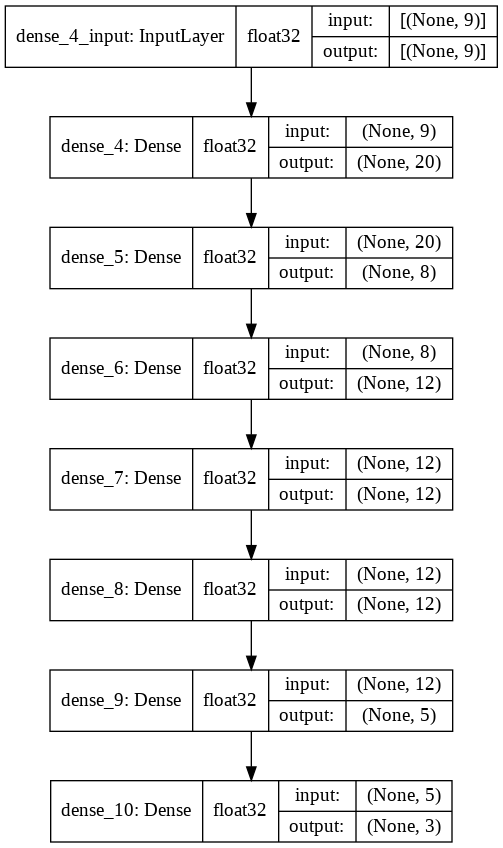

In [52]:
plot_model(model_2, show_shapes=True, show_dtype=True, expand_nested=True,to_file='MODEL_1_CNN.png') 

## MODEL 3-DNN - DESCRIPTION:



### Network architecture: 
###### LAYER-1 (Input Layer): 
The first layer is the input layer whih directly sees the input and have fully connected 20 neurons. The Initialization function is taken as he_normal to compensate the problem of exploding/vanishing gradient. We have used ReLU as non-linear actiation for this layer

###### LAYER-2 (Hidden Layer 1): 
The second layer is the first hidden layer with fully connected 8 neurons and intialization function as he_normal. We have used ReLU as non-linear actiation for this layer.

###### LAYER-3 (Hidden Layer 2):  
The third layer is the second hidden layer with fully connected 12 neurons and intialization function as he_normal. We have used ReLU as non-linear actiation for this layer.

###### LAYER-4 (Hidden Layer 3):  
The fourth layer is the third hidden layer with fully connected 5 neurons and intialization function as he_normal. We have used ReLU as non-linear actiation for this layer.

###### LAYER-5 (Output Layer): 

Since we have to classify our data into three category, we have 3 neurons in the output layer with softmax acyivation function to assign probability for each category. Also we have used he_normal as initialization weight.

### Optimizers: 
Model was compiled with optimizer as adam  with loss as sparse_categorical_crossentropy and metrics is taken as accuracy.Adam is the best among the adaptive optimizers in most of the cases. Good with sparse data: the adaptive learning rate is perfect for this type of datasets.

### Activation functions:
1. ReLu: The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better. The rectified linear activation is the default activation when developing Deep fully connected neural networks.
2. Softmax: The softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

### Regularization methods:
Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model


### Design choice:
This is deep full connected Neural network with same Initialization weight and  Activation function in all layers excpt outpyt layer. Total parameters to be trained are 559.

In [53]:
#model 3
seed = 7
np.random.seed(seed)
model_3 = Sequential()

model_3.add(Dense(20, activation='relu', kernel_initializer='he_normal' ,input_shape=(9,)))
model_3.add(Dense(8, activation= 'relu', kernel_initializer='he_normal'))
model_3.add(Dense(12, activation='relu', kernel_initializer='he_normal'))
model_3.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model_3.add(Dense(3,kernel_initializer='he_normal', activation='softmax'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
# rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1E-7)
# lrm = LearningRateMonitor()
# history = model_3.fit(X_train_z, y_train_z, epochs=50, batch_size=8, verbose=0 ,validation_data = (X_val_z,y_val_z))#, callbacks=EarlyStopping(patience=2))



# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='val')
# plt.legend()
# evaluate the model
# loss, acc = model.evaluate(X_val_z, y_val_z, verbose=0)
# print('Validation Accuracy: %.3f' % acc)
# max(history.history['val_accuracy'])
# sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])


In [54]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 65        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 18        
Total params: 559
Trainable params: 559
Non-trainable params: 0
_________________________________________________________________


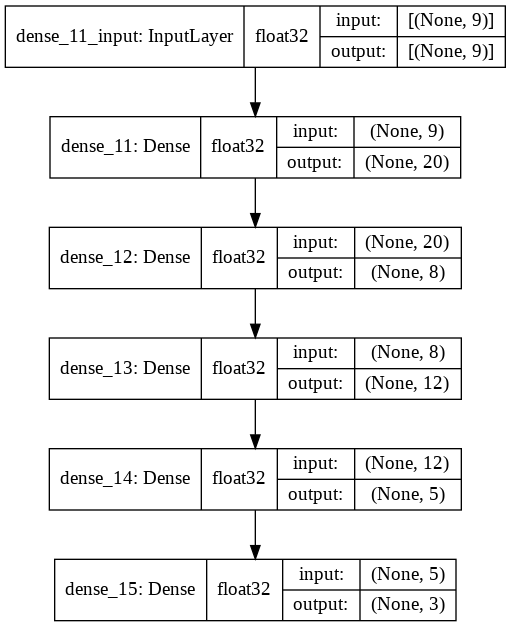

In [55]:
plot_model(model_3, show_shapes=True, show_dtype=True, expand_nested=True,to_file='MODEL_1_CNN.png') 

# CM3

### Part 1

We will be checkig the fit time between the models

In [56]:
fit_time = pd.read_csv("Fit time.csv")
fit_time.head()

,Model,Fit time(sec),Parameters
0,1,37,287
1,2,77,871
2,3,72,559


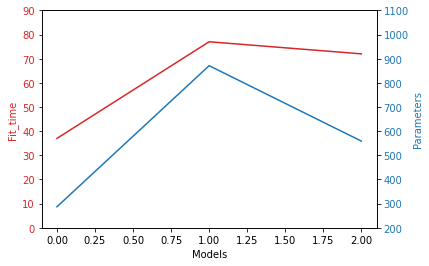

In [57]:
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Models')
ax1.set_ylabel('Fit_time', color=color)
ax1.plot(fit_time['Fit time(sec)'], label = 'fit Time(sec)', color = color)
ax1.set_ylim(0,90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Parameters', color = color)  # we already handled the x-label with ax1
ax2.plot(fit_time['Parameters'], label = 'Parameters', color = color)
ax2.set_ylim(200,1100)
ax2.tick_params(axis='y', labelcolor=color)

As we can see that the run time increases wth the increase in parameters, so we can see that fit time for the model with deep layers and higher parameters is quite high and the model with less hidden layers and less parameters are fitting quickly.

### Part 2

#### Model 1

In [58]:
from collections import defaultdict

def def_value():
    return "NA"
      
def get_param_configuration(model, X_train,y_train,X_val,y_val):
  param_dictionary = defaultdict(def_value)
  best_param_list=pd.DataFrame([]);
  list_of_epoch=[10,20] #,50,100,150
  list_of_batchsize=[8,16,32,64]#,32,64,128
  # bs=8
  for n in list_of_epoch:
    for bs in list_of_batchsize:
      model_clone = tf.keras.models.clone_model(model)
      early_stop = EarlyStopping(patience=2)
      model_clone.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
      history=model_clone.fit(X_train_z, y_train_z, epochs=n,batch_size=bs,validation_data=(X_val_z, y_val_z),callbacks=early_stop) 
      average_accuracy=sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])
      average_loss =sum(history.history['val_loss'])/len(history.history['val_loss'])
      no_of_epoch_original=n
      batch_size=bs
      no_of_epoch=len(history.history['loss'])
      param_dictionary['Model']='1'
      param_dictionary['no_of_epoch_original']=no_of_epoch_original
      param_dictionary['no_of_epoch']=no_of_epoch
      param_dictionary['batch_size']=batch_size
      param_dictionary['val_accuracy']=history.history['val_accuracy'][-1]
      param_dictionary['val_loss']=history.history['val_loss'][-1]
      #param_dictionary['average_accuracy']=average_accuracy
      #param_dictionary['average_loss']=average_loss
      best_param_list=best_param_list.append(param_dictionary,ignore_index=True)#sort=False,
  return best_param_list

In [59]:
best_param_list=get_param_configuration(model_1,X_train_z,y_train_z,X_val_z,y_val_z)
best_param_list

Epoch 1/10
1486/1486 [==============================] - 4s 2ms/step - loss: 1.0769 - accuracy: 0.5195 - val_loss: 0.7678 - val_accuracy: 0.6312
Epoch 2/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7649 - accuracy: 0.6136 - val_loss: 0.7462 - val_accuracy: 0.6528
Epoch 3/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7297 - accuracy: 0.6474 - val_loss: 0.7402 - val_accuracy: 0.6494
Epoch 4/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7123 - accuracy: 0.6556 - val_loss: 0.7339 - val_accuracy: 0.6507
Epoch 5/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7213 - accuracy: 0.6463 - val_loss: 0.7290 - val_accuracy: 0.6602
Epoch 6/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7299 - accuracy: 0.6456 - val_loss: 0.7309 - val_accuracy: 0.6494
Epoch 7/10
1486/1486 [==============================] - 2s 2ms/step - loss: 0.7241 - accuracy: 0.6495 - val_loss: 0.7378 - val_accuracy:

,Model,batch_size,no_of_epoch,no_of_epoch_original,val_accuracy,val_loss
0,1,8.0,7.0,10.0,0.647376,0.737842
1,1,16.0,7.0,10.0,0.648721,0.741512
2,1,32.0,10.0,10.0,0.644011,0.749274
3,1,64.0,10.0,10.0,0.634589,0.752580
4,1,8.0,16.0,20.0,0.661507,0.719000
5,1,16.0,12.0,20.0,0.619785,0.744445
6,1,32.0,8.0,20.0,0.648721,0.736405
7,1,64.0,9.0,20.0,0.647376,0.730493


Text(0.5, 1.0, 'Validation Accuracy for Model 1')

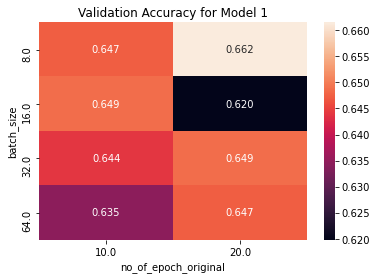

In [60]:
# For model 1, we will do heatmap of accuracy and loss
best_param_list1= best_param_list.pivot("batch_size", "no_of_epoch_original", "val_accuracy")
sns.heatmap(best_param_list1, annot= True, fmt = '.3f')
plt.title("Validation Accuracy for Model 1")

Text(0.5, 1.0, 'Validation Loss for Model 2')

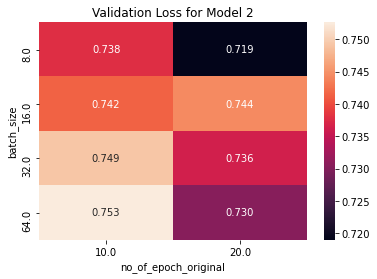

In [61]:
best_param_list2= best_param_list.pivot("batch_size", "no_of_epoch_original", "val_loss")
sns.heatmap(best_param_list2, annot= True, fmt = '.3f')
plt.title("Validation Loss for Model 2")

Best Parameter for Model 1

- Epoch : 20
- Batch Size : 8

#### Model 2

In [62]:
from collections import defaultdict

def def_value():
    return "NA"
      
def get_param_configuration(model, X_train,y_train,X_val,y_val):
  param_dictionary = defaultdict(def_value)
  best_param_list=pd.DataFrame([]);
  list_of_epoch=[10,20] #,50,100,150
  list_of_batchsize=[8,16,32,64]#,32,64,128
  # bs=8
  for n in list_of_epoch:
    for bs in list_of_batchsize:
      model_clone = tf.keras.models.clone_model(model)
      early_stop = EarlyStopping(patience=2)
      model_clone.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
      history=model_clone.fit(X_train_z, y_train_z, epochs=n,batch_size=bs,validation_data=(X_val_z, y_val_z),callbacks=early_stop) 
      average_accuracy=sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])
      average_loss =sum(history.history['val_loss'])/len(history.history['val_loss'])
      no_of_epoch_original=n
      batch_size=bs
      no_of_epoch=len(history.history['loss'])
      param_dictionary['Model']='2'
      param_dictionary['no_of_epoch_original']=no_of_epoch_original
      param_dictionary['no_of_epoch']=no_of_epoch
      param_dictionary['batch_size']=batch_size
      param_dictionary['val_accuracy']=history.history['val_accuracy'][-1]
      param_dictionary['val_loss']=history.history['val_loss'][-1]
      #param_dictionary['average_accuracy']=average_accuracy
      #param_dictionary['average_loss']=average_loss
      best_param_list=best_param_list.append(param_dictionary,ignore_index=True)#sort=False,
  return best_param_list

In [63]:
best_param_list=get_param_configuration(model_2,X_train_z,y_train_z,X_val_z,y_val_z)
best_param_list

Epoch 1/10
1486/1486 [==============================] - 4s 2ms/step - loss: 0.9482 - accuracy: 0.5248 - val_loss: 0.8066 - val_accuracy: 0.6009
Epoch 2/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7938 - accuracy: 0.5922 - val_loss: 0.7761 - val_accuracy: 0.5875
Epoch 3/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7616 - accuracy: 0.5959 - val_loss: 0.7601 - val_accuracy: 0.6016
Epoch 4/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7572 - accuracy: 0.5874 - val_loss: 0.7659 - val_accuracy: 0.6386
Epoch 5/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7548 - accuracy: 0.6419 - val_loss: 0.7522 - val_accuracy: 0.6555
Epoch 6/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7466 - accuracy: 0.6409 - val_loss: 0.7406 - val_accuracy: 0.6480
Epoch 7/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7376 - accuracy: 0.6413 - val_loss: 0.7398 - val_accuracy:

,Model,batch_size,no_of_epoch,no_of_epoch_original,val_accuracy,val_loss
0,2,8.0,10.0,10.0,0.649394,0.735987
1,2,16.0,5.0,10.0,0.649394,0.730927
2,2,32.0,5.0,10.0,0.655451,0.723582
3,2,64.0,10.0,10.0,0.650067,0.723400
4,2,8.0,7.0,20.0,0.652086,0.731652
5,2,16.0,9.0,20.0,0.652759,0.725293
6,2,32.0,12.0,20.0,0.576716,0.762142
7,2,64.0,16.0,20.0,0.658143,0.722778


Text(0.5, 1.0, 'Validation Accuracy for Model 2')

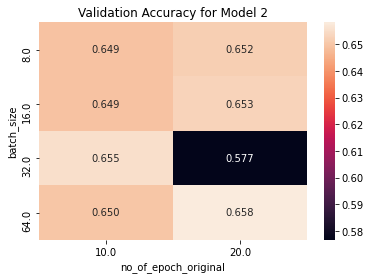

In [64]:
best_param_list1= best_param_list.pivot("batch_size", "no_of_epoch_original", "val_accuracy")
sns.heatmap(best_param_list1, annot= True, fmt = '.3f')
plt.title("Validation Accuracy for Model 2")

Text(0.5, 1.0, 'Validation Loss for Model 2')

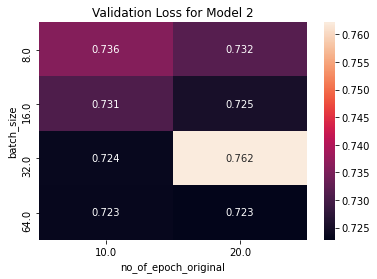

In [65]:
best_param_list2= best_param_list.pivot("batch_size", "no_of_epoch_original", "val_loss")
sns.heatmap(best_param_list2, annot= True, fmt = '.3f')
plt.title("Validation Loss for Model 2")

Best Parameter for Model 2

- Epoch : 20
- Batch Size : 64

#### Model 3

In [66]:
from collections import defaultdict

def def_value():
    return "NA"
      
def get_param_configuration(model, X_train,y_train,X_val,y_val):
  param_dictionary = defaultdict(def_value)
  best_param_list=pd.DataFrame([]);
  list_of_epoch=[10,20] #,50,100,150
  list_of_batchsize=[8,16,32,64]#,32,64,128
  # bs=8
  for n in list_of_epoch:
    for bs in list_of_batchsize:
      model_clone = tf.keras.models.clone_model(model)
      early_stop = EarlyStopping(patience=2)
      model_clone.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
      history=model_clone.fit(X_train_z, y_train_z, epochs=n,batch_size=bs,validation_data=(X_val_z, y_val_z),callbacks=early_stop) 
      average_accuracy=sum(history.history['val_accuracy'])/len(history.history['val_accuracy'])
      average_loss =sum(history.history['val_loss'])/len(history.history['val_loss'])
      no_of_epoch_original=n
      batch_size=bs
      no_of_epoch=len(history.history['loss'])
      param_dictionary['Model']='3'
      param_dictionary['no_of_epoch_original']=no_of_epoch_original
      param_dictionary['no_of_epoch']=no_of_epoch
      param_dictionary['batch_size']=batch_size
      param_dictionary['val_accuracy']=history.history['val_accuracy'][-1]
      param_dictionary['val_loss']=history.history['val_loss'][-1]
      #param_dictionary['average_accuracy']=average_accuracy
      #param_dictionary['average_loss']=average_loss
      best_param_list=best_param_list.append(param_dictionary,ignore_index=True)#sort=False,
  return best_param_list

In [67]:
best_param_list=get_param_configuration(model_3,X_train_z,y_train_z,X_val_z,y_val_z)
best_param_list

Epoch 1/10
1486/1486 [==============================] - 4s 2ms/step - loss: 1.0699 - accuracy: 0.4656 - val_loss: 0.7619 - val_accuracy: 0.6299
Epoch 2/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7394 - accuracy: 0.6324 - val_loss: 0.7514 - val_accuracy: 0.6279
Epoch 3/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7281 - accuracy: 0.6383 - val_loss: 0.7232 - val_accuracy: 0.6494
Epoch 4/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7228 - accuracy: 0.6493 - val_loss: 0.7271 - val_accuracy: 0.6380
Epoch 5/10
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7235 - accuracy: 0.6470 - val_loss: 0.7334 - val_accuracy: 0.6534
Epoch 1/10
743/743 [==============================] - 2s 2ms/step - loss: 1.1453 - accuracy: 0.4479 - val_loss: 0.7746 - val_accuracy: 0.6225
Epoch 2/10
743/743 [==============================] - 1s 2ms/step - loss: 0.7622 - accuracy: 0.6152 - val_loss: 0.7672 - val_accuracy: 0.6

,Model,batch_size,no_of_epoch,no_of_epoch_original,val_accuracy,val_loss
0,3,8.0,5.0,10.0,0.653432,0.733400
1,3,16.0,8.0,10.0,0.654105,0.724784
2,3,32.0,6.0,10.0,0.650067,0.741670
3,3,64.0,10.0,10.0,0.654105,0.732494
4,3,8.0,12.0,20.0,0.646703,0.721863
5,3,16.0,12.0,20.0,0.644011,0.733070
6,3,32.0,9.0,20.0,0.645357,0.736683
7,3,64.0,8.0,20.0,0.649394,0.733602


Text(0.5, 1.0, 'Validation Accuracy for Model 3')

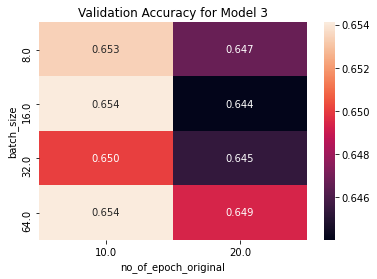

In [68]:
best_param_list1= best_param_list.pivot("batch_size", "no_of_epoch_original", "val_accuracy")
sns.heatmap(best_param_list1, annot= True, fmt = '.3f')
plt.title("Validation Accuracy for Model 3")

Text(0.5, 1.0, 'Validation Loss for Model 3')

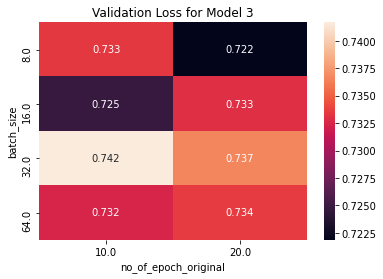

In [69]:
best_param_list2= best_param_list.pivot("batch_size", "no_of_epoch_original", "val_loss")
sns.heatmap(best_param_list2, annot= True, fmt = '.3f')
plt.title("Validation Loss for Model 3")

Best Parameter for Model 3

- Epoch : 10
- Batch Size : 16

### Part 3

#### Model 1

Epoch 1/20
1486/1486 [==============================] - 3s 2ms/step - loss: 0.9478 - accuracy: 0.5186 - val_loss: 0.7531 - val_accuracy: 0.6319
Epoch 2/20
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7443 - accuracy: 0.6394 - val_loss: 0.7433 - val_accuracy: 0.6427
Epoch 3/20
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7354 - accuracy: 0.6387 - val_loss: 0.7574 - val_accuracy: 0.6292
Epoch 4/20
1486/1486 [==============================] - 3s 2ms/step - loss: 0.7347 - accuracy: 0.6491 - val_loss: 0.7853 - val_accuracy: 0.6245


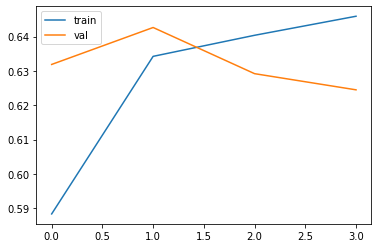

In [70]:
history=model_1.fit(X_train_z, y_train_z, epochs=20,batch_size=8,validation_data=(X_val_z, y_val_z),callbacks=early_stop)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()



#### Model 2

Epoch 1/20
186/186 [==============================] - 1s 4ms/step - loss: 0.7222 - accuracy: 0.6537 - val_loss: 0.7218 - val_accuracy: 0.6555
Epoch 2/20
186/186 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.6522 - val_loss: 0.7470 - val_accuracy: 0.6427
Epoch 3/20
186/186 [==============================] - 0s 3ms/step - loss: 0.7234 - accuracy: 0.6520 - val_loss: 0.7230 - val_accuracy: 0.6581


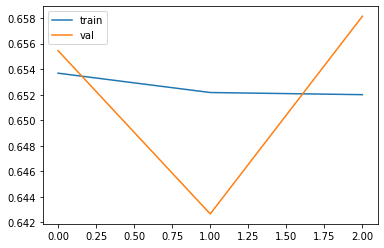

In [74]:
history=model_2.fit(X_train_z, y_train_z, epochs=20,batch_size=64,validation_data=(X_val_z, y_val_z),callbacks=early_stop)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

#### Model 3

Epoch 1/10
743/743 [==============================] - 2s 2ms/step - loss: 1.1201 - accuracy: 0.3899 - val_loss: 0.8910 - val_accuracy: 0.5821
Epoch 2/10
743/743 [==============================] - 1s 2ms/step - loss: 0.8406 - accuracy: 0.5952 - val_loss: 0.7703 - val_accuracy: 0.6494
Epoch 3/10
743/743 [==============================] - 1s 2ms/step - loss: 0.7467 - accuracy: 0.6360 - val_loss: 0.7351 - val_accuracy: 0.6528
Epoch 4/10
743/743 [==============================] - 2s 2ms/step - loss: 0.7282 - accuracy: 0.6449 - val_loss: 0.7324 - val_accuracy: 0.6555
Epoch 5/10
743/743 [==============================] - 1s 2ms/step - loss: 0.7224 - accuracy: 0.6534 - val_loss: 0.7323 - val_accuracy: 0.6474
Epoch 6/10
743/743 [==============================] - 1s 2ms/step - loss: 0.7419 - accuracy: 0.6420 - val_loss: 0.7384 - val_accuracy: 0.6494
Epoch 7/10
743/743 [==============================] - 1s 2ms/step - loss: 0.7180 - accuracy: 0.6527 - val_loss: 0.7358 - val_accuracy: 0.6460


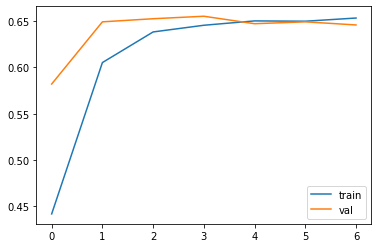

In [72]:
history=model_3.fit(X_train_z, y_train_z, epochs=10,batch_size=16,validation_data=(X_val_z, y_val_z),callbacks=early_stop)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

## Part4

From the above comparison of models, we got to know that model 3 works best and we would be evaluating on the test set to find the test accuracy.

In [73]:
loss, acc = model_3.evaluate(X_test_z, y_test_z, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.641


In [106]:
from sklearn.metrics import confusion_matrix
def get_confusion_matrics_heatmap(X_test_z,y_test_z,model):
  y_pred=model.predict_classes(X_test_z)
  confusion = confusion_matrix(y_test_z, y_pred)
  plt.title("Confusion matrix for Model 3 Evaluation")

  sns.heatmap(confusion, annot=True,    fmt='d', cmap='Blues')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


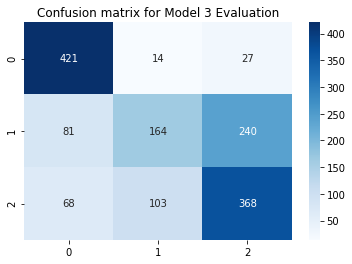

In [107]:
get_confusion_matrics_heatmap(X_test_z,y_test_z,model_3)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score, roc_auc_score,confusion_matrix
from sklearn.metrics import classification_report

def get_metrics(model):
  # target_names=['TARGET-1','TARGET-2','TARGET-3','TARGET-4','TARGET-5']
  ypred=model.predict_classes(X_test_z)
  # ypred=ypred+1
  # y_true=((np.argmax(y_test_z, axis=1)))
  print(classification_report(y_test_z, ypred))

In [97]:
get_metrics(model_3)

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       462
           1       0.58      0.34      0.43       485
           2       0.58      0.68      0.63       539

    accuracy                           0.64      1486
   macro avg       0.63      0.64      0.62      1486
weighted avg       0.63      0.64      0.62      1486



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# For different epoch/initializer/batch/optiizer Ignore this whole code chunk)

## Model 1

In [ ]:
def create_model_2(init_mode='he_normal',optimizer='adam'):
    # define model
    model = Sequential()
    model.add(Dense(3, kernel_initializer=init_mode, activation='relu', input_dim=9)) 
    model.add(Dense(3, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    # compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [ ]:
seed = 7
np.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_2, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] 
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [128, 512]
epochs = [10,20,50,100,150]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batch_size,init_mode = init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,n_jobs =-1,
                    cv=3)
grid_result = grid.fit(X_train_z, y_train_z)

KeyboardInterrupt: ignored

In [ ]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.6528 using {'batch_size': 128, 'epochs': 150, 'init_mode': 'he_normal'}
mean=0.5846, std=0.009141 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'uniform'}
mean=0.5912, std=0.004382 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'lecun_uniform'}
mean=0.5075, std=0.1169 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'normal'}
mean=0.3319, std=0.003216 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'zero'}
mean=0.6078, std=0.01447 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'glorot_normal'}
mean=0.6017, std=0.02201 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'glorot_uniform'}
mean=0.5278, std=0.04908 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'he_normal'}
mean=0.5055, std=0.08122 using {'batch_size': 128, 'epochs': 10, 'init_mode': 'he_uniform'}
mean=0.5891, std=0.006248 using {'batch_size': 128, 'epochs': 20, 'init_mode': 'uniform'}
mean=0.589, std=0.007496 using {'batch_size': 128, 'epochs': 20, 'init_mode': 'lecun

## Model 2

In [ ]:
def create_model_3(init_mode='he_normal',optimizer='adam'):
    # define model
    model = Sequential()
    model.add(Dense(8, kernel_initializer=init_mode, activation='relu', input_dim=9)) 
    model.add(Dropout(0.1))
    model.add(Dense(5, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    # compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [ ]:
seed = 7
np.random.seed(seed)

# create the sklearn model for the network
model_init_batch_epoch_CV = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_3, verbose=1)

# we choose the initializers that came at the top in our previous cross-validation!!
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] 
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [8,16,32,64,128,256, 512]
epochs = [10,20,50,100,150]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batch_size,init_mode = init_mode)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,n_jobs =-1,
                    cv=3)
grid_result = grid.fit(X_train_z, y_train_z)

Epoch 1/150
372/372 [==============================] - 1s 1ms/step - loss: 1.1340 - accuracy: 0.3407
Epoch 2/150
372/372 [==============================] - 0s 1ms/step - loss: 0.9585 - accuracy: 0.5286
Epoch 3/150
372/372 [==============================] - 0s 1ms/step - loss: 0.8628 - accuracy: 0.5737
Epoch 4/150
372/372 [==============================] - 0s 1ms/step - loss: 0.8214 - accuracy: 0.5913
Epoch 5/150
372/372 [==============================] - 0s 1ms/step - loss: 0.7922 - accuracy: 0.6266
Epoch 6/150
372/372 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.6338
Epoch 7/150
372/372 [==============================] - 0s 1ms/step - loss: 0.7666 - accuracy: 0.6463
Epoch 8/150
372/372 [==============================] - 0s 1ms/step - loss: 0.7664 - accuracy: 0.6271
Epoch 9/150
372/372 [==============================] - 0s 1ms/step - loss: 0.7512 - accuracy: 0.6407
Epoch 10/150
372/372 [==============================] - 0s 1ms/step - loss: 0.7387 - accura

In [ ]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

## Using Keras Classifier

For different initialization function

In [ ]:
# https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594

def create_model(init_mode='he_normal'):
    # define model
    model = Sequential()
    model.add(Dense(3, kernel_initializer=init_mode, activation='relu', input_dim=9)) 
    model.add(Dense(3, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    # compile model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [ ]:
import keras
from sklearn.model_selection import GridSearchCV
seed = 7
np.random.seed(seed)
batch_size = 16
epochs = 150

model_CV = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_z, y_train_z)

In [ ]:
# print results
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.6509929100672404 using {'init_mode': 'uniform'}
 mean=0.651, std=0.009194 using {'init_mode': 'uniform'}
 mean=0.634, std=0.02366 using {'init_mode': 'lecun_uniform'}
 mean=0.6139, std=0.01649 using {'init_mode': 'normal'}
 mean=0.3366, std=0.004407 using {'init_mode': 'zero'}
 mean=0.5422, std=0.1463 using {'init_mode': 'glorot_normal'}
 mean=0.6419, std=0.02109 using {'init_mode': 'glorot_uniform'}
 mean=0.6466, std=0.01077 using {'init_mode': 'he_normal'}
 mean=0.6477, std=0.009995 using {'init_mode': 'he_uniform'}
